In [94]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv").sample(frac=1)

X, y = df[df.columns[1:-1]], df.Species

In [95]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [96]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
119,120,6.0,2.2,5.0,1.5,Iris-virginica
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
44,45,5.1,3.8,1.9,0.4,Iris-setosa
102,103,7.1,3.0,5.9,2.1,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-versicolor


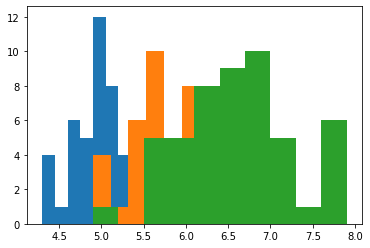

SepalLengthCm


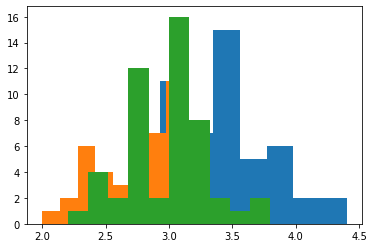

SepalWidthCm


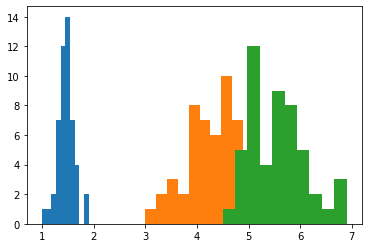

PetalLengthCm


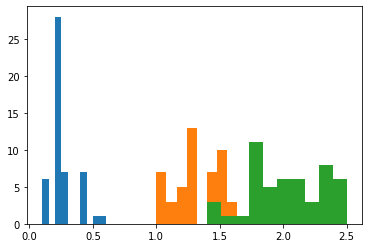

PetalWidthCm


In [97]:
for f in df.columns[1:-1]:
    plt.hist(df[df.Species=='Iris-setosa'][f])
    plt.hist(df[df.Species=='Iris-versicolor'][f])
    plt.hist(df[df.Species=='Iris-virginica'][f])
    plt.show()
    print(f)

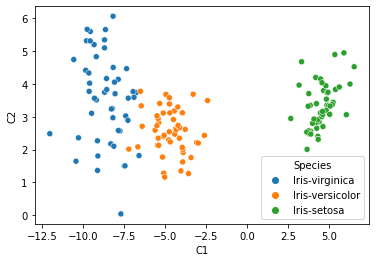

In [98]:
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(shrinkage="auto", solver="eigen").fit(X, y)
df[["C1","C2"]] = clf.transform(X)
y_hat = clf.predict(X)

sns.scatterplot(x='C1', y='C2', data=df, hue='Species')
plt.show()

In [99]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_hat)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

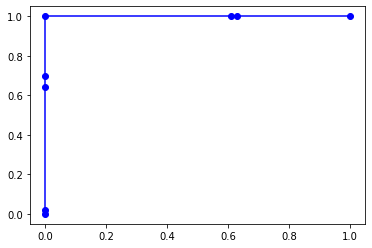

In [108]:
from sklearn.linear_model import LogisticRegression

y_ = y=="Iris-setosa"
lr = LogisticRegression().fit(X, y_)
y_score = lr.predict_proba(X)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_, y_score)
plt.plot(fpr, tpr, 'bo-')
plt.show()

In [116]:
lr = LogisticRegression().fit(X, y)
y_scores = lr.predict_proba(X)

from sklearn.metrics import roc_auc_score, SCORERS

roc_auc_score(y, y_scores, multi_class='ovr')

0.9983333333333334

In [120]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X, y, cv=5, scoring="roc_auc_ovr")

array([0.99333333, 1.        , 1.        , 1.        , 1.        ])

In [118]:

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

<AxesSubplot:xlabel='C1', ylabel='C2'>

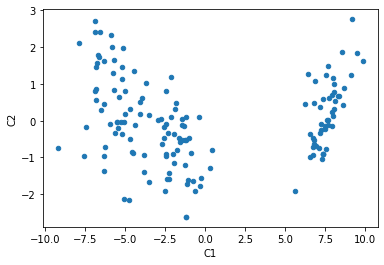

In [37]:
df.plot(x="C1", y="C2", kind="scatter")

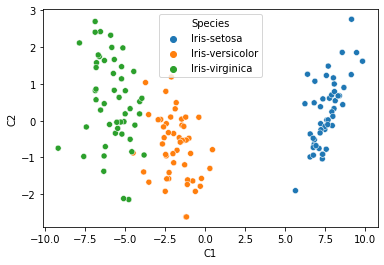

In [39]:
import seaborn as sns

sns.scatterplot(x='C1', y='C2', data=df, hue='Species')
plt.show()

In [42]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy="most_frequent").fit(X, y)
dc.score(X, y)

0.3333333333333333

In [44]:
y_scores = clf.decision_function(X)

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_scores, multi_class='ovo')

ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes